In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSBA 6211/Tractor-Sales.csv")
df

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203
...,...,...
139,14-Aug,848
140,14-Sep,640
141,14-Oct,581
142,14-Nov,519


In [ ]:
dates = pd.date_range(start = '2003-01-01', freq = 'MS', periods = len(df))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [ ]:
df['Date'] = dates

In [ ]:
df.set_index("Date", inplace = True)

In [ ]:
df

,Month-Year,Number of Tractor Sold
Date,,
2003-01-01,3-Jan,141
2003-02-01,3-Feb,157
2003-03-01,3-Mar,185
2003-04-01,3-Apr,199
2003-05-01,3-May,203
...,...,...
2014-08-01,14-Aug,848
2014-09-01,14-Sep,640
2014-10-01,14-Oct,581


In [ ]:
sales_ts = df['Number of Tractor Sold']
sales_ts

Date
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Number of Tractor Sold, Length: 144, dtype: int64

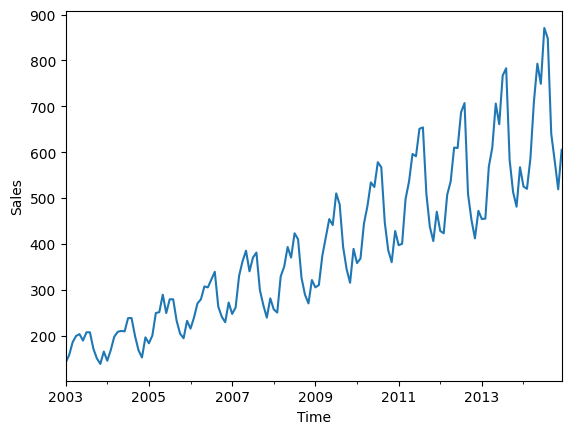

In [ ]:
# plot time series 1

import matplotlib.pylab as plt

ax = sales_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
plt.show()

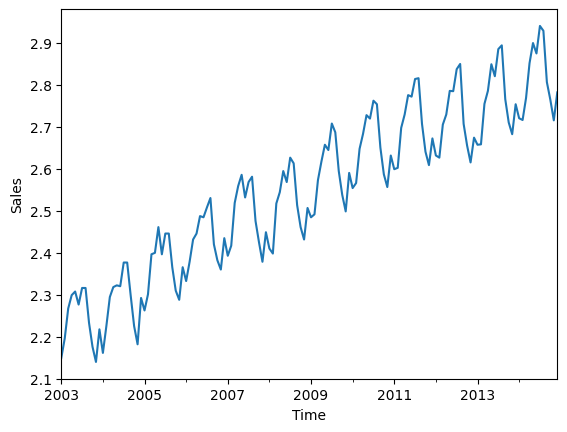

In [ ]:
# plot time series 2

sales_ts_log = np.log10(sales_ts)
ax = sales_ts_log.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
plt.show()

In [ ]:
# differences
import statsmodels.tsa.api as smt

sales_ts_log_diff = sales_ts_log.diff(periods = 1)
sales_ts_log_diff

Date
2003-01-01         NaN
2003-02-01    0.046681
2003-03-01    0.071272
2003-04-01    0.031681
2003-05-01    0.008643
                ...   
2014-08-01   -0.011622
2014-09-01   -0.122216
2014-10-01   -0.042004
2014-11-01   -0.049009
2014-12-01    0.066588
Name: Number of Tractor Sold, Length: 144, dtype: float64

In [ ]:
sales_ts_log_diff.dropna(inplace = True)

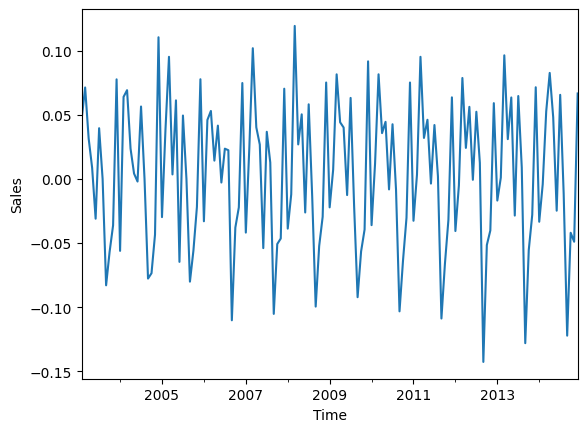

In [ ]:
# plot time series 3

ax = sales_ts_log_diff.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
plt.show()

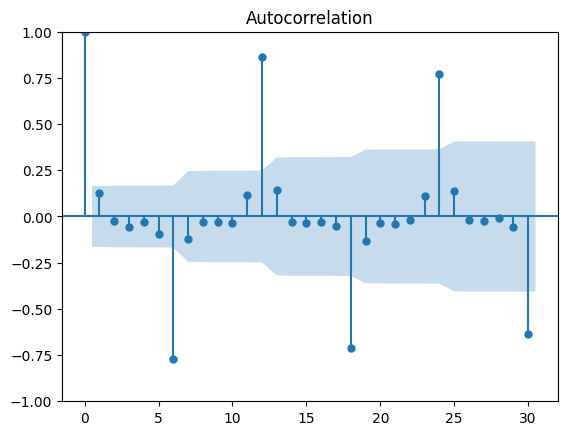

In [ ]:
# acf plot

smt.graphics.plot_acf(sales_ts_log_diff,
                     lags = 30,
                     alpha = 0.05)
plt.show()


In [ ]:
nValid =36
nTrain = len(sales_ts_log)-nValid
train_ts = sales_ts_log[:nTrain]
valid_ts = sales_ts_log[nTrain:]

In [ ]:
# run arima model
! pip install pmdarima
from pmdarima import auto_arima

model = auto_arima(sales_ts_log, trace=True, information_criterion='aic',
                   seasonal=True, m=12, start_p = 1, start_q = 1, d =1)
# m = period of seasonal difference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-699.318, Time=3.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-653.884, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-694.787, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-702.786, Time=1.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-669.792, Time=0.23 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-701.290, Time=2.04 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-701.328, Time=2.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-697.118, Time=0.67 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-699.292, Time=1.95 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-686.399, Time=0.48 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-701.098, Time=1.45 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-700.921, Time=1.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-701.028, Time=0.50 sec
 ARIMA(1

In [ ]:
import statsmodels.api as sm

best_model = sm.tsa.statespace.SARIMAX(train_ts,
                                       order=(0,1,1),
                                       seasonal_order=(0,1,1,12))
best_results = best_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:             Number of Tractor Sold   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 254.717
Date:                            Mon, 22 Apr 2024   AIC                           -503.434
Time:                                    14:50:41   BIC                           -495.772
Sample:                                01-01-2003   HQIC                          -500.338
                                     - 12-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3918      0.097     -4.052      0.000      -0.581      -0.202
ma.S.L12      -0.5814      0.112   

In [ ]:
pred = best_results.get_forecast(steps=36,alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
pred.predicted_mean

2012-01-01    2.645498
2012-02-01    2.654038
2012-03-01    2.744564
2012-04-01    2.778025
2012-05-01    2.821623
2012-06-01    2.810057
2012-07-01    2.856012
2012-08-01    2.851982
2012-09-01    2.748805
2012-10-01    2.687424
2012-11-01    2.654591
2012-12-01    2.727442
2013-01-01    2.696969
2013-02-01    2.705509
2013-03-01    2.796035
2013-04-01    2.829496
2013-05-01    2.873093
2013-06-01    2.861527
2013-07-01    2.907483
2013-08-01    2.903453
2013-09-01    2.800276
2013-10-01    2.738894
2013-11-01    2.706062
2013-12-01    2.778912
2014-01-01    2.748439
2014-02-01    2.756979
2014-03-01    2.847506
2014-04-01    2.880967
2014-05-01    2.924564
2014-06-01    2.912998
2014-07-01    2.958954
2014-08-01    2.954924
2014-09-01    2.851747
2014-10-01    2.790365
2014-11-01    2.757533
2014-12-01    2.830383
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
!pip install dmba # data mining for business analytics

from dmba import regressionSummary
regressionSummary(valid_ts, pred.predicted_mean)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.0 MB/s eta 0:00:00
Colab environment detected.

Regression statistics

                      Mean Error (ME) : -0.0337
       Root Mean Squared Error (RMSE) : 0.0365
            Mean Absolute Error (MAE) : 0.0337
          Mean Percentage Error (MPE) : -1.2262
Mean Absolute Percentage Error (MAPE) : 1.2262
